In [ ]:
# %load_ext watermark
# %watermark -v -p sklearn,numpy,scipy,matplotlib

In [ ]:
# 분류 - 이진분류(binary classification) / 다중분류(multiclass classification)
# 이진분류 - 두 가지로 분류
# 다중분류 - 여러 그룹

# 회귀 - 단순회귀/ 다중회귀

In [ ]:
# 과대적합 - 가진 정보를 모두 사용해서 너무 복잡한 모델, 훈련세트에 과도적합, 새로운 데이터에 일반화 부족
#           데이터셋이 크먼 과대적합 줄일 수 있다.
# 과소적합 - 모델이 너무 간단, 훈련 세트에도 부적합
# 목표 -> 일반화 성능이 최대가 되는 모델, 일반화(generation) - 새로운 데이터를 정확하게 예측.

In [4]:
import sklearn

In [13]:
from sklearn import datasets
from sklearn.datasets import make_blobs

In [6]:
sklearn.__version__

'0.21.2'

In [7]:
from IPython.display import display
import numpy as np
import pandas as pd
import mglearn

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import mglearn

In [9]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

## 지도 학습
### 분류와 회귀

### 지도 학습 알고리즘

In [16]:
plt.rcParams['figure.dpi'] = 80
# 데이터셋을 만든다 - 두개의 특성을 가진 인위적으로 만든 이진분류 데이터셋
# x축은 첫 번째 특성, y축은 두 번째 특성

X, y = mglearn.datasets.make_forge()

# 산점도를 그린다.
print(X)
print('=========================================')
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape : (26, 2)


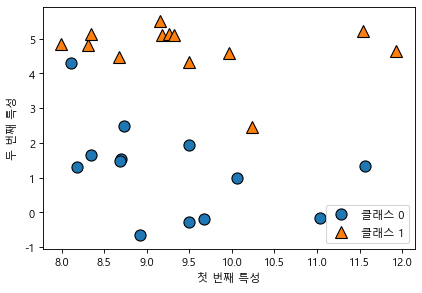

In [17]:
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape : {}".format(X.shape))

In [18]:
# 인위적으로 만든 단순회귀 데이터셋
X, y = mglearn.datasets.make_wave(n_samples = 40)
print(X)
print(y)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

Text(0, 0.5, '타깃')

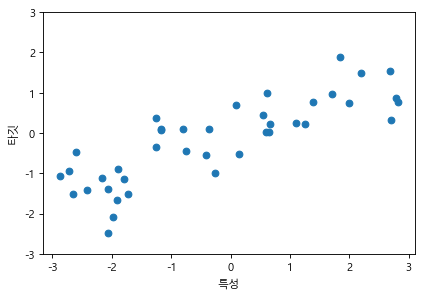

In [19]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [20]:
# 위스콘신 유방암 데이터셋 - dictionary 구조

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : {}".format(cancer.keys()))

cancer.keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [21]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [22]:
cancer.data.shape

(569, 30)

In [23]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
cancer.target.shape

(569,)

In [25]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

유방암 데이터의 형태 : (569, 30)


In [28]:
print("클래스별 샘플 갯수 : \n {}".format( {n : v 
                                    for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수 : 
 {'malignant': 212, 'benign': 357}


In [29]:
print("특성 이름:\n {}".format(cancer.feature_names))

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [30]:
# 보스턴 주택가격 데이터셋

from sklearn.datasets import load_boston

boston = load_boston()
print("boston.keys(): {}".format(boston.keys()))

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [31]:
print("boston 데이터의 형태: {}".format(boston.data.shape))

boston 데이터의 형태: (506, 13)


In [32]:
# 유도된 보스턴 주택가격 데이터셋 - 특성끼리 곱한 특성 추가 (feature engineering)

X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-최근접 이웃
* 가장 간단한 알고리즘
* 이진분류, 다중분류

#### k-최근접 이웃 분류

c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


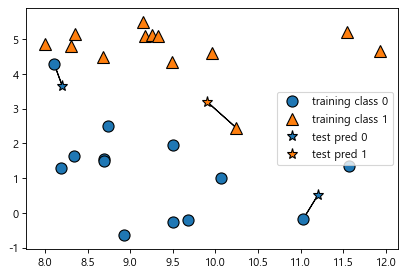

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


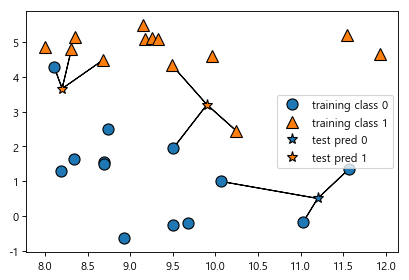

In [41]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [38]:
from sklearn.model_selection import train_test_split

x, y = mglearn.datasets.make_forge()
print(x)
print(y)

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size = 0.3, random_state = 0)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
# KNeighborsClassifier, k=3

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [40]:
# train
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
# test data predict
print("테스트 세트 예측: {}".format(knn.predict(x_test)))

테스트 세트 예측: [1 0 1 0 1 0 0 0]


In [42]:
# test_data score
print("테스트 세트 정확도: {:.2f}".format(knn.score(x_test, y_test)))

테스트 세트 정확도: 0.88


#### KNeighborsClassifier 분석

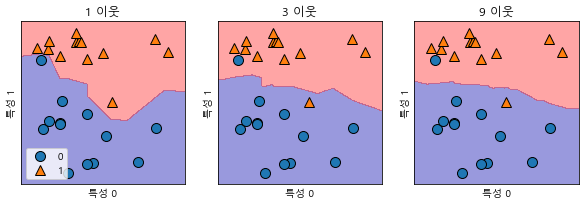

In [45]:
# binary classification

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend(loc=3)

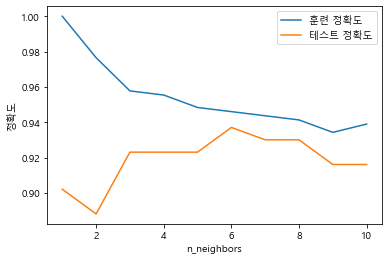

In [46]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(x_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#### k-Neighbors Regression

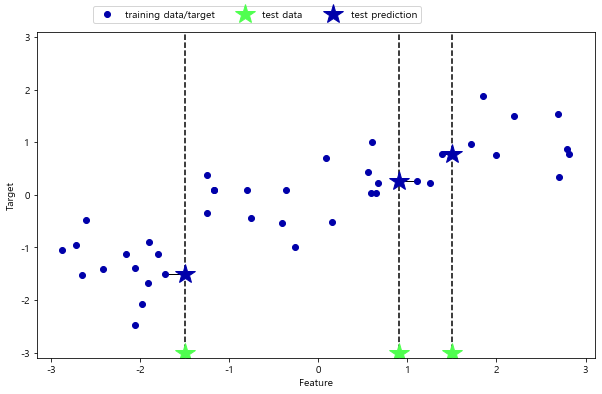

In [47]:
# knn regression (n = 1) - 가장 가까운 이웃값

mglearn.plots.plot_knn_regression(n_neighbors = 1)

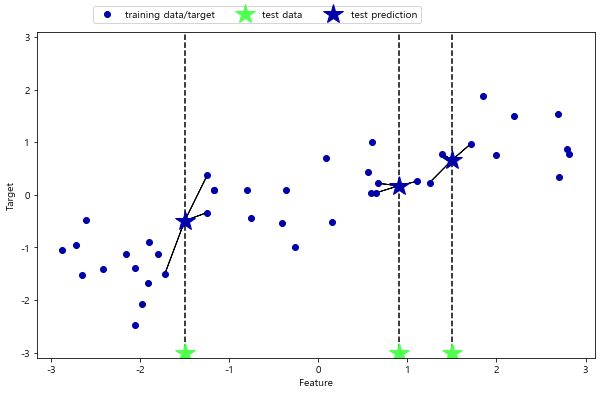

In [48]:
# knn regression (n = n) - 가장 가까운 이웃값들의 평균

mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples = 40)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [50]:
print("테스트 세트 예측:\n{}".format(reg.predict(x_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [51]:
print('실제 세트 :', y_test)

실제 세트 : [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


In [52]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(x_test, y_test)))

테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

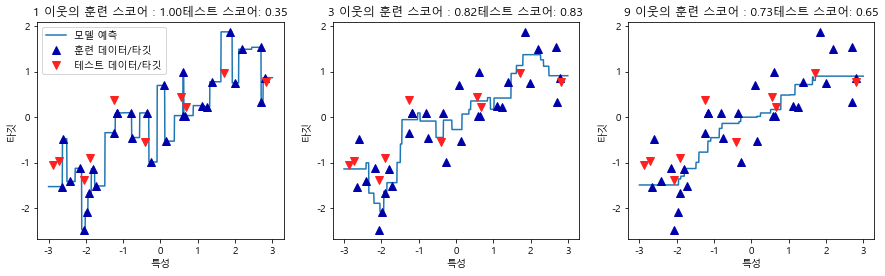

In [53]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(x_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어 : {:.2f}테스트 스코어: {:.2f}" \
        .format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc = "best")

In [54]:
import sklearn

from sklearn import datasets
from sklearn.model_selection import train_test_split

from IPython.display import display
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import mglearn

[1.0, 0.9247403010387959, 0.8829293571714603, 0.8632782135538125, 0.8538958377499823, 0.8383310170463022, 0.8273634660563398, 0.8162409017030599, 0.8105809387462038, 0.8103455586177656]
Training_Accuracy_Best
[0.5802935010482181, 0.7151991614255766, 0.7535057069648264, 0.7526729559748428, 0.7313878406708596, 0.7426799440950385, 0.7516022761305781, 0.7493939989517819, 0.7475839221471647, 0.743979035639413]


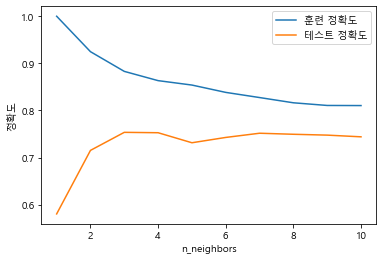

In [55]:
# KNN 다중 회귀 분석

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

for i in neighbors_settings:
    knr = KNeighborsRegressor(n_neighbors=i)
    
    knr.fit(x_train, y_train)
    training_accuracy.append(knr.score(x_train, y_train))
    test_accuracy.append(knr.score(x_test, y_test))
    
print(training_accuracy)
print('Training_Accuracy_Best')
print(test_accuracy)
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [56]:
# cross_validation

from sklearn.model_selection import cross_val_score

In [57]:
knn_reg = KNeighborsRegressor(n_neighbors=6)

# cross_val_scores(모델, 훈련데이터, 타깃데이터, cv=?)
scores = cross_val_score(knn_reg, cancer.data, cancer.target, cv=5)
print('교차검증점수 : {}'.format(scores))
print('교차검증평균 : {}'.format(scores.mean()))
print('교차검증편차 : {}'.format(scores.std())) # 편차가 크다 - cv에 의존적이거나 데이터수가 적은 경우

교차검증점수 : [0.51001705 0.73652538 0.87697072 0.75591616 0.66141075]
교차검증평균 : 0.7081680115173086
교차검증편차 : 0.12085398276285679


In [58]:
knn_reg = KNeighborsRegressor(n_neighbors=6)

# cross_val_scores(모델, 훈련데이터, 타깃데이터, cv=?)
scores = cross_val_score(knn_reg, cancer.data, cancer.target, scoring='neg_mean_squared_error', cv=5)
print('교차검증점수 : {}'.format(scores))
print('교차검증평균 : {}'.format(scores.mean()))
print('교차검증편차 : {}'.format(scores.std())) # 편차가 크다 - cv에 의존적이거나 데이터수가 적은 경우

교차검증점수 : [-0.11793372 -0.06457115 -0.02802144 -0.0462963  -0.05998033]
교차검증평균 : -0.0633605892804775
교차검증편차 : 0.030103700493914677


#### 장단점과 파라메타

### 선형 모델
#### 선형 회귀 모델
\begin{align*}
\end{align*}

w[0]: 0.393906  b: -0.031804


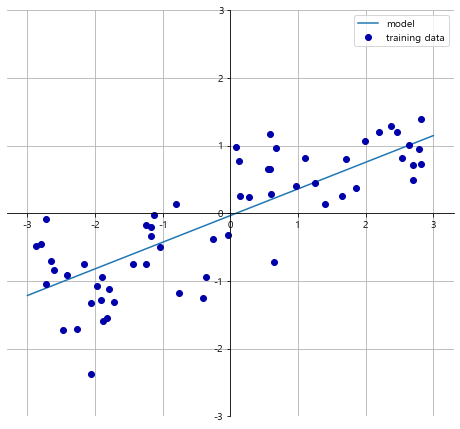

In [59]:
mglearn.plots.plot_linear_regression_wave()

#### 선형회귀(최소제곱법)


In [60]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [61]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [62]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [64]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# 과적합

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 릿지 회귀
* 가중치(w)의 제곱합을 가능하면 적게, w의 모든 원소가 0에 가깝도록
* 모든 특성이 출력에 주는 영향을 최소한으로 (기울기를 작게 만든다)
* 규제 - 과대적합이 되지 않도록 모델을 강제로 제한
* L2규제
* 평균제곱오차식에 a*(가중치(w)제곱합)을 더 한다. a의 크기에 따라 패널티의 정도가 달라진다

In [65]:
# 과대적합 - 훈련세트에 과대적합, 테스트세트에는 부적합
from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=0).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.60


In [66]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [67]:
# ridge01  /alpha = 0.01
from sklearn.linear_model import Ridge

ridge_001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [68]:
# ridge01 alpha =0.1
ridge_1 = Ridge(alpha=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [69]:
# ridge01 / alpha=1
ridge_10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


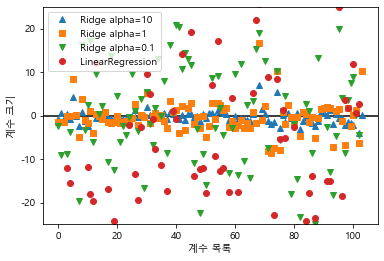

In [70]:
plt.plot(ridge_10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_001.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

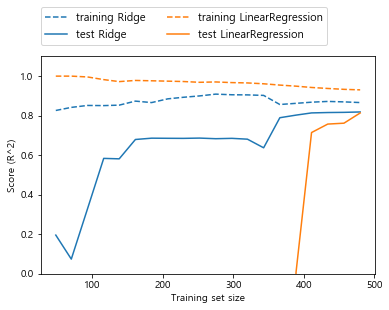

In [71]:
mglearn.plots.plot_ridge_n_samples()

#### Lasso
* 가중치(w)의 절대값합을 가증하면 적게, w의 모든 원소가 0에 가깝도록
* 모든 특성이 출력에 주는 영향을 최소한으로 (기울기를 작게 만든다) 
* 일부 계수를 실제로 0으로 만든다. 특성선택이 자동으로 이루어진다.
* 규제 - 과대적합이 되지 않도록 모델을 강제로 제한
* L2규제
* 평균제곱오차식에 a*(가중치(w)절대값합)을 더 한다. a의 크기에 따라 패널티의 정도가 달라진다

In [72]:
from sklearn.linear_model import Lasso # 과소적합, 105 중 4개의 특성만 사용

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [73]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))

print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [74]:
#과대적합, alpha값이 낮아지면 규제가 적어져서 선형회귀와 유사하게 됨.
lasso00001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))

print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [75]:
#과소적합
lasso00001 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)


print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

사용한 특성의 개수: 4


Text(0, 0.5, '계수 크기')

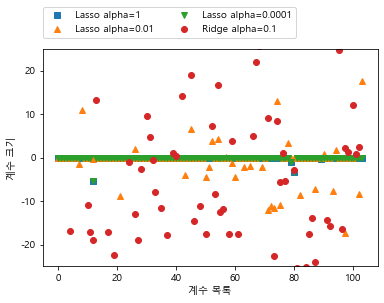

In [76]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

## 분류에 대한 선형 모델

c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


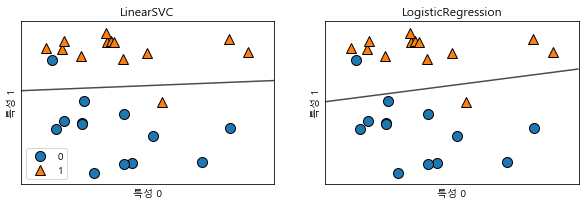

In [77]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

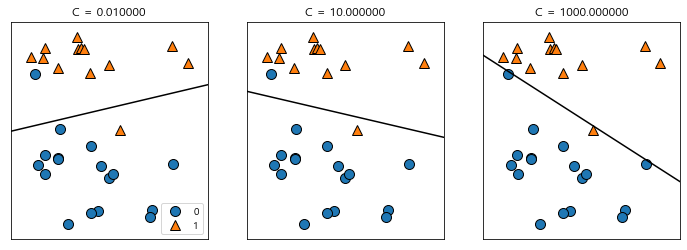

In [78]:
# C가 커지면 규제가 감소, 훈련세트에 최대한 맞춤, 개개의 데이터 포인트를 정확히 분류하려고 함
# C가 작아지면 규제 강화, 계수(w)가 최대한 0에 가깝도록, 다수의 데이터 포인트에 맞추려 함

mglearn.plots.plot_linear_svc_regularization()

In [79]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=
    cancer.target, random_state=42)


logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, 
    stratify=cancer.target, random_state=42)

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
# 규제를 풀었다. - 정확도가 모두 올라갔다. 모델이 복잡할수록 성능이 좋아짐

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.979
테스트 세트 점수: 0.965


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
# 규제를 보다 강화 - 과소적합

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


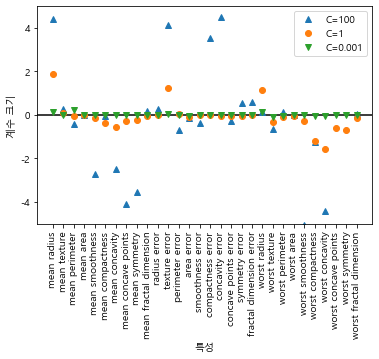

In [83]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


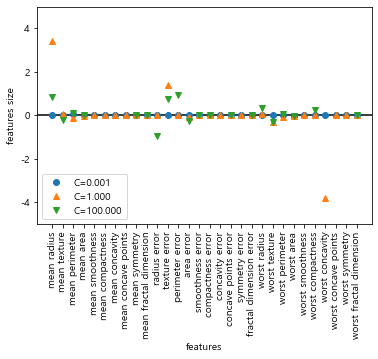

In [84]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("features")
plt.ylabel("features size")

plt.ylim(-5, 5)
plt.legend(loc=3)

# penalty - 규제의 종류
# Penalty - l1 : 일부특성만 사용하는 L1규제
# Penalty - l2 : 전체 특성을 사용하는 L2규제

### 결정 트리

* 사전 가지치기 - 1.깊이제어  2.리프의 최대 개수  3.노트가 분할하기 위한 최소 샘플 개수
* 사후 가지치기 - 삭제 또는 병합 (sklearn에서는 지원하지 않음)
* 특성 중요도(feature_importance_) - 중요도 합은 1, 중요도는 양수 - 어떤 클래스를 지원하는지는 나타나지 않음 

#### 결정 트리 만들기

#### 결정 트리의 복잡도 제어하기

In [85]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, \
    random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

print('훈련 세트 정확도:', dtree.score(X_train, y_train))
print('테스트 세트 정확도:', dtree.score(X_test, y_test))

# tree model

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.9370629370629371


In [86]:
# tree model maxdepth = 4

dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)

print('훈련 세트 정확도:', dtree.score(X_train, y_train))
print('테스트 세트 정확도:', dtree.score(X_test, y_test))

훈련 세트 정확도: 0.9859154929577465
테스트 세트 정확도: 0.9230769230769231


#### 트리의 특성 중요도

In [87]:
print("특성 중요도:\n{}".format(dtree.feature_importances_))

특성 중요도:
[0.         0.02254739 0.         0.         0.         0.
 0.00901896 0.02714774 0.         0.         0.         0.
 0.         0.01678666 0.01496479 0.         0.         0.
 0.         0.         0.         0.03325003 0.73915246 0.00517949
 0.00901896 0.         0.01027992 0.1126536  0.         0.        ]


In [88]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

NameError: name 'tree' is not defined

### 결정 트리의 앙상블
#### 랜덤 포레스트
* 단일 트리는 과적합하기 쉽다
* 잘 작동하되 서로 다른 방향으로 과적합된 트리를 많이 만들면 그 결과를 평균냄으로 성능을 유지하면서 과적합을 줄이는 것으로 수학적 증명
* 많은 트리를 만들고 서로 다른 트리와 구별되어야, 트리가 달라지도록 트리를 만들 때 무작되성 부여
* 트리를 랜덤하게 만드는 방법 - 데이터셋을 무작위로, 트리의 분할 특성을 무작위로
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, \
    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.958041958041958


c:\users\taehoon\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


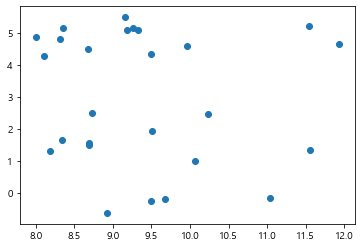

In [90]:
plt.scatter(X[:,0], X[:,1])

ValueError: Number of features of the model must match the input. Model n_features is 30 and input n_features is 2 

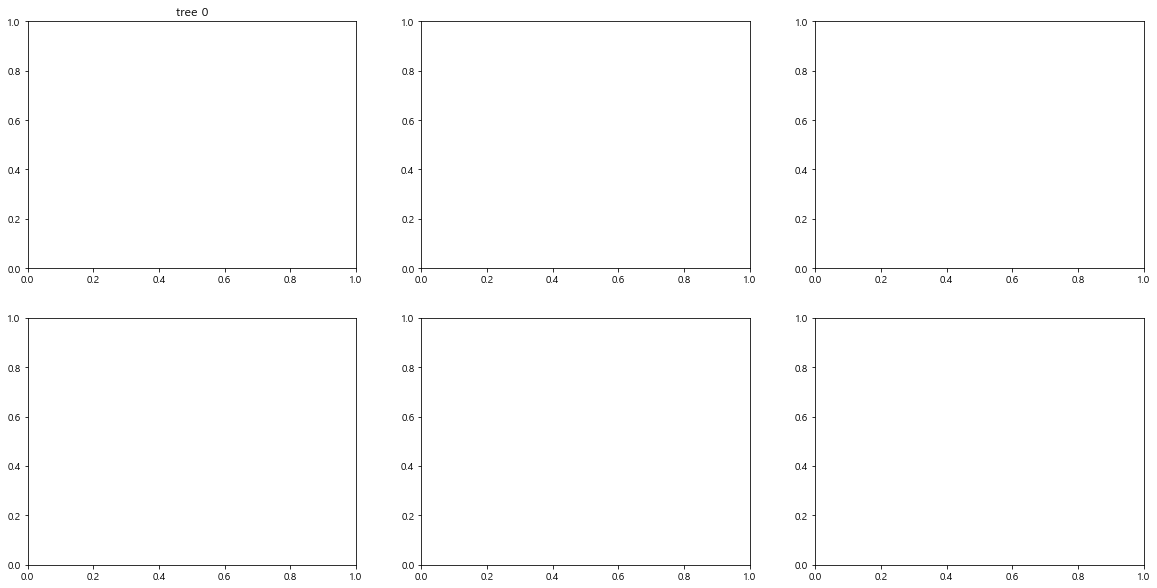

In [95]:
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("randomforest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [92]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [93]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

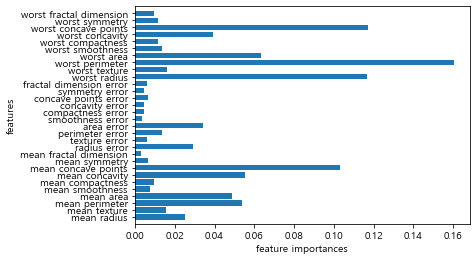

In [94]:
plot_feature_importances_cancer(forest)


### SVM 이해하기
\begin{align*}
\end{align*}

Text(0, 0.5, 'feature 1')

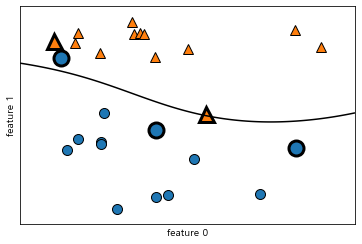

In [96]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()  

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#### SVM 파라미터 튜닝

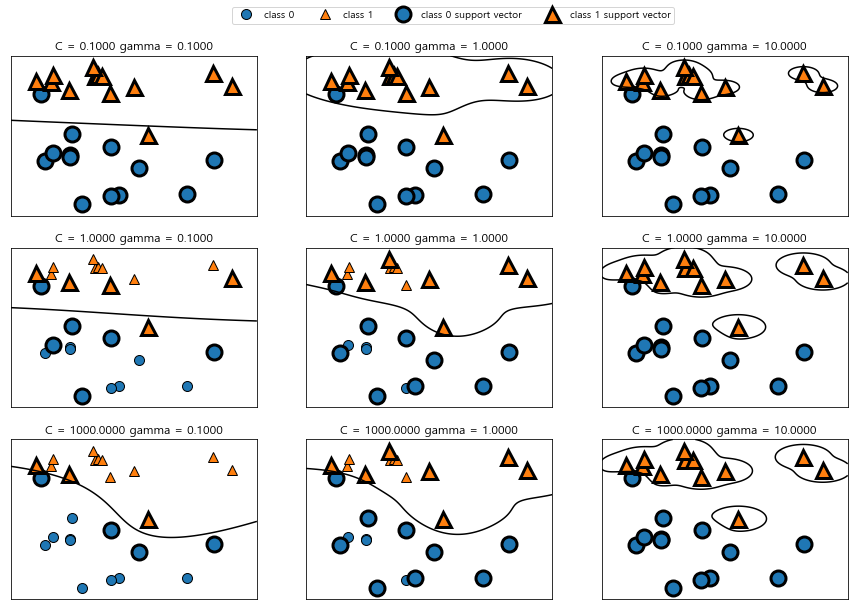

In [97]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))

# gamma 
# 하나의 훈련 샘플이 미치는 영향의 범위
# 커질수록 모델의 복잡도를 높인다.
# C
# 규제 매개변수, 각 포인트의 중요도
# 커질수록 규제가 약화되어 모델의 복잡도 높아짐

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=77)

svc = SVC(C=0.1, gamma=100)
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.63
테스트 세트 정확도: 0.62


In [99]:
score = 0

# use for, select best score and best parameters set

sv_score = 0
        
for ci in [0.1, 0.5, 1, 2, 4, 8, 20, 100]:
    for gi in [0.1, 1, 10, 100, 1000, 10000]:
        svc = SVC(C = ci, gamma = gi)
        svc.fit(X_train, y_train)
        score = svc.score(X_test, y_test)
        print(score)
        if sv_score < score:
            sv_score = score
            C = ci
            gamma = gi
            
best_score = sv_score

print(best_score)
print('C :', C, 'gamma :', gamma )

0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
0.6223776223776224
C : 0.1 gamma : 0.1


In [100]:
# train score and test score of best model
svc = SVC(C =100, gamma = 10000)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6223776223776224

In [101]:
# use gridsearchCV

from sklearn.model_selection import GridSearchCV

param = {'C':[0.1, 0.5, 1, 2, 4, 8, 20, 100], \
         'gamma':[0.1, 1, 10, 100, 1000, 10000]}

grid = GridSearchCV(svc, param_grid=param)
grid.fit(X_train, y_train)

c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=10000,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2, 4, 8, 20, 100],
                         'gamma': [0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
# best score
grid.best_score_

0.6291079812206573

In [103]:
# best parameters set
grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [104]:
# train score and test score
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

0.6291079812206573
0.6223776223776224


Text(0, 0.5, '특성 크기')

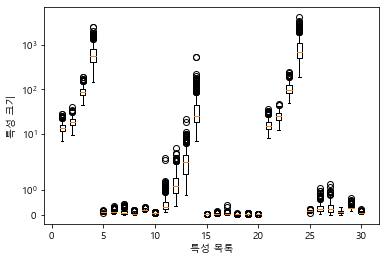

In [106]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

#### SVM 을 위한 데이터 전처리

In [107]:
# data scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_xtrain = scaler.transform(X_train)
scaled_xtest = scaler.transform(X_test)

In [108]:
svc = SVC(C=10000, gamma=10000)
svc.fit(scaled_xtrain, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(scaled_xtrain, \
                                           y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(scaled_xtest, \
                                            y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.622


In [109]:
# model optimization through scaling data

from sklearn.model_selection import GridSearchCV

param = {'C':[0.1, 0.5, 1, 2, 4, 8, 20, 100], \
         'gamma':[0.1, 1, 10, 100, 1000, 10000]}

grid = GridSearchCV(svc, param_grid=param)
grid.fit(scaled_xtrain, y_train)

c:\users\taehoon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=10000, cache_size=200, class_weight=None,
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma=10000, kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2, 4, 8, 20, 100],
                         'gamma': [0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
print(grid.score(scaled_xtrain, y_train))
print(grid.score(scaled_xtest, y_test))

1.0
0.958041958041958
